In [180]:
import time

import pandas as pd
import matplotlib.pyplot as plt

Gathering data about football players from Central Europe with posibility to add new leagues.

In [181]:
df_overall_data = pd.read_csv("./data/data.csv", encoding='cp1250')
df_bio = pd.read_csv("./data/players_bio_data.csv", encoding='cp1250')

In [182]:
df_overall_data.head()

,team_name,league,country,player_name,player_url,player_pos,player_age,nationality,in_squad,appearances,goals,minutes_played
0,Rakow Czestochowa,PKO Ekstraklasa,Poland,Vladan Kovacevic,https://www.transfermarkt.com/vladan-kovacevic...,Goalkeeper,24.0,Bosnia-Herzegovina,23,21,0,1920
1,Rakow Czestochowa,PKO Ekstraklasa,Poland,Kacper Trelowski,https://www.transfermarkt.com/kacper-trelowski...,Goalkeeper,19.0,Poland,28,8,0,720
2,Rakow Czestochowa,PKO Ekstraklasa,Poland,Xavier Dziekonski,https://www.transfermarkt.com/xavier-dziekonsk...,Goalkeeper,19.0,Poland,4,0,0,0
3,Rakow Czestochowa,PKO Ekstraklasa,Poland,Jakub Rajczykowski,https://www.transfermarkt.com/jakub-rajczykows...,Goalkeeper,18.0,Poland,8,0,0,0
4,Rakow Czestochowa,PKO Ekstraklasa,Poland,Stratos Svarnas,https://www.transfermarkt.com/stratos-svarnas/...,Centre-Back,25.0,Greece,29,24,3,2182


In [183]:
df_bio.head()

,player_name,name_in_home_country,date_of_birth,place_of_birth,age,height,citizenship,position,foot,player_agent,...,on_loan_from,contract_there_expires,twitter,facebook,x2nd_club,full_name,website,x3nd_club,x4nd_club,date_of_death
0,Vladan Kovacevic,Vladan Kovačević,1998-04-11,Banja Luka,24.0,1.92,Bosnia-Herzegovina Serbia,Goalkeeper,right,firsteleven ISM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kacper Trelowski,Kacper Trelowski,2003-08-19,Częstochowa,19.0,1.93,Poland,Goalkeeper,both,INNfootball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Xavier Dziekonski,Xavier Dziekoński,2003-10-06,Grajewo,19.0,1.88,Poland,Goalkeeper,right,BMG-SPORT,...,Rakow Czestochowa,"Jun 30, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jakub Rajczykowski,NaN,2005-02-04,NaN,18.0,NaN,Poland,Goalkeeper,NaN,KFM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Stratos Svarnas,<U+03A3><U+03C4><U+03C1><U+03AC><U+03C4><U+03B...,1997-11-11,Athen,25.0,1.86,Greece,Defender - Centre-Back,right,P&P Sport Management S.A.M.,...,AEK Athens,"Jun 30, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
df_overall_data.shape[0], df_bio.shape[0]

(6727, 6650)

In [185]:
df = pd.merge(df_overall_data, df_bio, how="outer", on=["player_name"]).drop_duplicates()
player_url = df["player_url"]

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6799 entries, 0 to 7640
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   team_name                        6799 non-null   object 
 1   league                           6799 non-null   object 
 2   country                          6799 non-null   object 
 3   player_name                      6799 non-null   object 
 4   player_url                       6799 non-null   object 
 5   player_pos                       6799 non-null   object 
 6   player_age                       6778 non-null   float64
 7   nationality                      6799 non-null   object 
 8   in_squad                         6799 non-null   int64  
 9   appearances                      6799 non-null   int64  
 10  goals                            6799 non-null   int64  
 11  minutes_played                   6799 non-null   int64  
 12  name_in_home_country

In [187]:
df.head()

,team_name,league,country,player_name,player_url,player_pos,player_age,nationality,in_squad,appearances,...,on_loan_from,contract_there_expires,twitter,facebook,x2nd_club,full_name,website,x3nd_club,x4nd_club,date_of_death
0,Rakow Czestochowa,PKO Ekstraklasa,Poland,Vladan Kovacevic,https://www.transfermarkt.com/vladan-kovacevic...,Goalkeeper,24.0,Bosnia-Herzegovina,23,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rakow Czestochowa,PKO Ekstraklasa,Poland,Kacper Trelowski,https://www.transfermarkt.com/kacper-trelowski...,Goalkeeper,19.0,Poland,28,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rakow Czestochowa,PKO Ekstraklasa,Poland,Xavier Dziekonski,https://www.transfermarkt.com/xavier-dziekonsk...,Goalkeeper,19.0,Poland,4,0,...,Rakow Czestochowa,"Jun 30, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rakow Czestochowa,PKO Ekstraklasa,Poland,Jakub Rajczykowski,https://www.transfermarkt.com/jakub-rajczykows...,Goalkeeper,18.0,Poland,8,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rakow Czestochowa,PKO Ekstraklasa,Poland,Stratos Svarnas,https://www.transfermarkt.com/stratos-svarnas/...,Centre-Back,25.0,Greece,29,24,...,AEK Athens,"Jun 30, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
df["player_name"] = df["player_url"].apply(
    lambda x: str(x).split("/")[3].replace("-", " ").title() if "transfermarkt" in str(x) else x)

In [189]:
# print(df["player_url"].unique())

In [190]:
df = df[['team_name',
         'league',
         'country',
         'player_name',
         'player_pos',
         'player_age',
         'nationality',
         'in_squad',
         'appearances',
         'goals',
         'minutes_played',
         'height',
         'foot',
         'player_agent',
         'joined',
         'contract_expires',
         'date_of_last_contract_extension',
         'outfitter',
         'player_valuation',
         'max_player_valuation',
         'max_player_valuation_date',
         'contract_option',
         'on_loan_from',
         'contract_there_expires']]
df["goals_per_game"] = df.goals / df.appearances

In [191]:
df.head()

,team_name,league,country,player_name,player_pos,player_age,nationality,in_squad,appearances,goals,...,contract_expires,date_of_last_contract_extension,outfitter,player_valuation,max_player_valuation,max_player_valuation_date,contract_option,on_loan_from,contract_there_expires,goals_per_game
0,Rakow Czestochowa,PKO Ekstraklasa,Poland,Vladan Kovacevic,Goalkeeper,24.0,Bosnia-Herzegovina,23,21,0,...,2026-06-30,2022-07-07,Uhlsport,5000000.0,5000000.0,2022-09-29,NaN,NaN,NaN,0.000
1,Rakow Czestochowa,PKO Ekstraklasa,Poland,Kacper Trelowski,Goalkeeper,19.0,Poland,28,8,0,...,2025-06-30,2022-02-15,adidas,NaN,NaN,2021-12-31,Option for a further year,NaN,NaN,0.000
2,Rakow Czestochowa,PKO Ekstraklasa,Poland,Xavier Dziekonski,Goalkeeper,19.0,Poland,4,0,0,...,2023-06-30,NaN,Nike,NaN,1500000.0,2021-05-21,NaN,Rakow Czestochowa,"Jun 30, 2025",NaN
3,Rakow Czestochowa,PKO Ekstraklasa,Poland,Jakub Rajczykowski,Goalkeeper,18.0,Poland,8,0,0,...,2025-06-30,NaN,NaN,NaN,NaN,2022-09-29,NaN,NaN,NaN,NaN
4,Rakow Czestochowa,PKO Ekstraklasa,Poland,Stratos Svarnas,Centre-Back,25.0,Greece,29,24,3,...,2023-06-30,NaN,NaN,2000000.0,2000000.0,2022-11-16,Option to buy,AEK Athens,"Jun 30, 2025",0.125


In [192]:
df.player_agent.unique()

array(['firsteleven ISM', 'INNfootball', 'BMG-SPORT', ...,
       'CWJ Genu Prima', 'Eurofoot4all', 'Sport Futbol'], dtype=object)

In [193]:
def position_name(x):
    pos_dict = {'Goalkeeper': 'GK',
                'Centre-Back': 'CB',
                'Attacking Midfield': 'AM',
                'Right Midfield': 'RM',
                'Defensive Midfield': 'DM',
                'Left Midfield': 'LM',
                'Central Midfield': 'CM',
                'Centre-Forward': 'CF',
                'Right-Back': 'RB',
                'Left-Back': 'LB',
                'Left Winger': 'LW',
                'Right Winger': 'RW',
                'midfield': 'CM',
                'Second Striker': 'SecST',
                'Attack': 'ST',
                'Defender': 'CB'}
    try:
        return pos_dict[x]
    except:
        return x

In [194]:
df["player_pos"] = df["player_pos"].apply(lambda x: position_name(x))

In [195]:
df.head()

,team_name,league,country,player_name,player_pos,player_age,nationality,in_squad,appearances,goals,...,contract_expires,date_of_last_contract_extension,outfitter,player_valuation,max_player_valuation,max_player_valuation_date,contract_option,on_loan_from,contract_there_expires,goals_per_game
0,Rakow Czestochowa,PKO Ekstraklasa,Poland,Vladan Kovacevic,GK,24.0,Bosnia-Herzegovina,23,21,0,...,2026-06-30,2022-07-07,Uhlsport,5000000.0,5000000.0,2022-09-29,NaN,NaN,NaN,0.000
1,Rakow Czestochowa,PKO Ekstraklasa,Poland,Kacper Trelowski,GK,19.0,Poland,28,8,0,...,2025-06-30,2022-02-15,adidas,NaN,NaN,2021-12-31,Option for a further year,NaN,NaN,0.000
2,Rakow Czestochowa,PKO Ekstraklasa,Poland,Xavier Dziekonski,GK,19.0,Poland,4,0,0,...,2023-06-30,NaN,Nike,NaN,1500000.0,2021-05-21,NaN,Rakow Czestochowa,"Jun 30, 2025",NaN
3,Rakow Czestochowa,PKO Ekstraklasa,Poland,Jakub Rajczykowski,GK,18.0,Poland,8,0,0,...,2025-06-30,NaN,NaN,NaN,NaN,2022-09-29,NaN,NaN,NaN,NaN
4,Rakow Czestochowa,PKO Ekstraklasa,Poland,Stratos Svarnas,CB,25.0,Greece,29,24,3,...,2023-06-30,NaN,NaN,2000000.0,2000000.0,2022-11-16,Option to buy,AEK Athens,"Jun 30, 2025",0.125


In [196]:
df_RKS = df.query("team_name == 'Rakow Czestochowa'")

<AxesSubplot: >

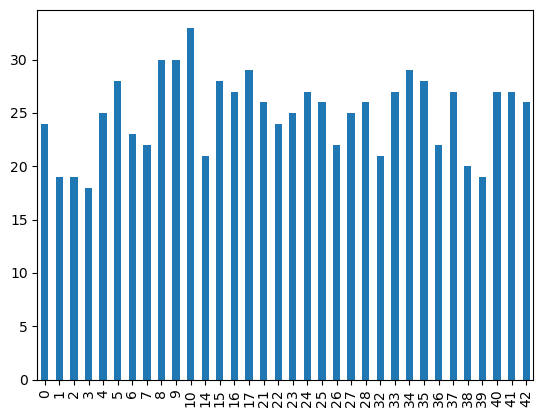

In [197]:
df_RKS["player_age"].plot(kind='bar')

In [198]:
df_RKS["player_age"].mean()

25.0

In [199]:
starting_eleven = df_RKS.sort_values(by="minutes_played", ascending=False)[:11]

In [200]:
starting_eleven["player_age"].min(), starting_eleven["player_age"].max()

(24.0, 30.0)

In [201]:
df_RKS.groupby(by="player_pos").count()["team_name"]

player_pos
AM    7
CB    8
CF    3
CM    5
DM    2
GK    4
LM    2
RM    3
Name: team_name, dtype: int64

In [202]:
df_RKS.groupby(by="nationality").count()["team_name"]

nationality
Bosnia-Herzegovina     1
Croatia                2
Czech Republic         1
Georgia                1
Greece                 2
Latvia                 1
Poland                18
Portugal               1
Romania                2
Serbia                 1
Spain                  2
Sweden                 1
Ukraine                1
Name: team_name, dtype: int64

In [203]:
df.groupby(by="nationality").count().sort_values("player_name", ascending=False)[:11]["player_name"]

nationality
Serbia                702
Greece                472
Czech Republic        463
Croatia               455
Poland                417
Bosnia-Herzegovina    404
Montenegro            369
North Macedonia       355
Bulgaria              353
Slovakia              338
Albania               292
Name: player_name, dtype: int64

<h3>Let's add players' coutries population to our data set!

In [204]:
print(df.nationality.unique().tolist())

['Bosnia-Herzegovina', 'Poland', 'Greece', 'Croatia', 'Romania', 'Czech Republic', 'Serbia', 'Spain', 'Ukraine', 'Sweden', 'Portugal', 'Georgia', 'Latvia', 'Slovakia', 'Scotland', 'Norway', "Cote d'Ivoire", 'Mauritius', 'Israel', 'Germany', 'Albania', 'Kosovo', 'Slovenia', 'Brazil', 'Austria', 'Armenia', 'Iran', 'Finland', 'Denmark', 'North Macedonia', 'Japan', 'Senegal', 'Lithuania', 'France', 'Colombia', 'The Gambia', 'Cameroon', 'Switzerland', 'Netherlands', 'Turkey', 'Mali', 'Bulgaria', 'England', 'Hungary', 'Estonia', 'Azerbaijan', 'Belgium', 'Iceland', 'Guinea-Bissau', 'DR Congo', 'South Africa', 'Cape Verde', 'Dominican Republic', 'Curacao', 'Montenegro', 'Mexico', 'Argentina', 'Chile', 'Canada', 'Belarus', 'Liberia', 'Nigeria', 'Australia', 'Benin', 'Angola', 'Iraq', 'Russia', 'Korea, South', 'Malaysia', 'Ghana', 'Martinique', 'Guinea', 'United States', 'Suriname', 'Venezuela', 'Panama', 'Congo', 'Syria', 'Moldova', 'Cyprus', 'Indonesia', 'Central African Republic', 'Morocco', 

In [205]:
population_dict = {'Bosnia-Herzegovina': 3280819, 'Poland': 37950802, 'Greece': 10473455, 'Croatia': 4087843,
                   'Romania': 19237682, 'Czech Republic': 10724567, 'Serbia': 6908224, 'Spain': 46754778,
                   'Ukraine': 43733762, 'Sweden': 10160115, 'Portugal': 10191409, 'Georgia': 3989167, 'Latvia': 1901548,
                   'Slovakia': 5457013, 'Scotland': 5463300, 'Norway': 5421241, "Cote d'Ivoire": 26378274,
                   'Mauritius': 1265577, 'Israel': 8891800, 'Germany': 83240525, 'Albania': 2854191, 'Kosovo': 1791034,
                   'Slovenia': 2079976, 'Brazil': 212559417, 'Austria': 8917205, 'Armenia': 2963243, 'Iran': 84571111,
                   'Finland': 5540720, 'Denmark': 5822763, 'North Macedonia': 2083374, 'Japan': 126050000,
                   'Lithuania': 2722289, 'France': 67391582, 'The Gambia': 2347706, 'Cameroon': 26545864,
                   'Switzerland': 8715866, 'Netherlands': 17173000, 'Turkey': 84339067, 'Mali': 20250834,
                   'Bulgaria': 6975761, 'England': 56286961, 'Hungary': 9764000, 'Estonia': 1321977,
                   'Azerbaijan': 10139177, 'Iceland': 341243, 'Belgium': 11556247, 'Guinea-Bissau': 1968001,
                   'DR Congo': 101780263, 'South Africa': 59966000, 'Cape Verde': 549935, 'Colombia': 50339443,
                   'Dominican Republic': 10738958, 'Curacao': 157538, 'Montenegro': 628066, 'Mexico': 130222815,
                   'Argentina': 45605822, 'Chile': 19116209, 'Canada': 38131104, 'Belarus': 9417849, 'Liberia': 5057681,
                   'Nigeria': 200963599, 'Australia': 25499881, 'Benin': 12123200, 'Senegal': 15854360,
                   'Angola': 31825295, 'Iraq': 40222493, 'Russia': 144373535, 'Korea, South': 51269185,
                   'Malaysia': 32722760, 'Ghana': 30417856, 'Martinique': 375673, 'Guinea': 12771246,
                   'United States': 332915073, 'Suriname': 597927, 'Morocco': 36471769, 'Panama': 4246439,
                   'Congo': 5380508, 'Wales': 3139000, 'Venezuela': 28515829, 'Moldova': 2657637, 'Cyprus': 1207359,
                   'Niger': 24566000, 'Burkina Faso': 20903000, 'Burundi': 12256000, 'Tunisia': 11935000,
                   'Honduras': 10097000, 'Luxembourg': 633000, 'Italy': 60483000, 'Comoros': 877000,
                   'China': 1411778724, 'Uruguay': 3477000, 'Algeria': 44616626, 'Togo': 8279000, 'Jamaica': 2963000,
                   'Kenya': 52574000, 'Gabon': 2172900, 'Zambia': 18978000, 'Mauritania': 4643000,
                   'Solomon Islands': 686000, 'Southern Sudan': 10980000, 'Tanzania': 59632000,
                   'Central African Republic': 4829000, 'Haiti': 11402000, 'Tajikistan': 9576000, 'Palestine': 4981000,
                   'Mozambique': 31255000, 'Madagascar': 28020000, 'Costa Rica': 5094000, 'Uganda': 44517000,
                   'Libya': 6871300, 'Sierra Leone': 7977000, 'Egypt': 102334000, 'Trinidad and Tobago': 1390000,
                   'Paraguay': 7132530, 'Saudi Arabia': 34814000, 'New Zealand': 4987000, 'Syria': 17502000,
                   'Indonesia': 273523615, 'Bolivia': 11633000, 'Saint-Martin': 38666, 'Jordan': 10269416}

In [206]:
df["player_population"] = df["nationality"].apply(lambda x: population_dict[x] if x in population_dict.keys() else None)

In [207]:
df_greece = df.query("country=='Greece'")

In [208]:
df_greece.describe().T

,count,mean,std,min,25%,50%,75%,max
player_age,797.0,2.550188e+01,4.849396e+00,15.00,22.00,25.00,2.900000e+01,3.900000e+01
in_squad,798.0,1.361529e+01,8.091454e+00,0.00,7.00,15.00,1.900000e+01,3.700000e+01
appearances,798.0,1.034712e+01,8.083849e+00,0.00,2.00,10.00,1.700000e+01,3.500000e+01
goals,798.0,7.631579e-01,1.725968e+00,0.00,0.00,0.00,1.000000e+00,1.500000e+01
minutes_played,798.0,6.804148e+02,6.313081e+02,0.00,76.25,537.50,1.207750e+03,2.796000e+03
height,720.0,1.810764e+00,6.729298e-02,1.64,1.76,1.81,1.860000e+00,1.990000e+00
player_valuation,126.0,2.731746e+06,2.024160e+06,1000000.00,1500000.00,2000000.00,3.500000e+06,1.200000e+07
max_player_valuation,244.0,5.309426e+06,8.502883e+06,1000000.00,1500000.00,2500000.00,5.000000e+06,8.000000e+07
goals_per_game,675.0,5.993616e-02,1.156413e-01,0.00,0.00,0.00,7.692308e-02,1.000000e+00
player_population,798.0,2.529802e+07,4.306932e+07,38666.00,10473455.00,10473455.00,1.717300e+07,3.329151e+08


In [209]:
filtered_greece = df_greece[["player_name", "goals", "appearances", "goals_per_game", "player_age", "player_valuation",
                             "max_player_valuation"]].query("goals>=8")

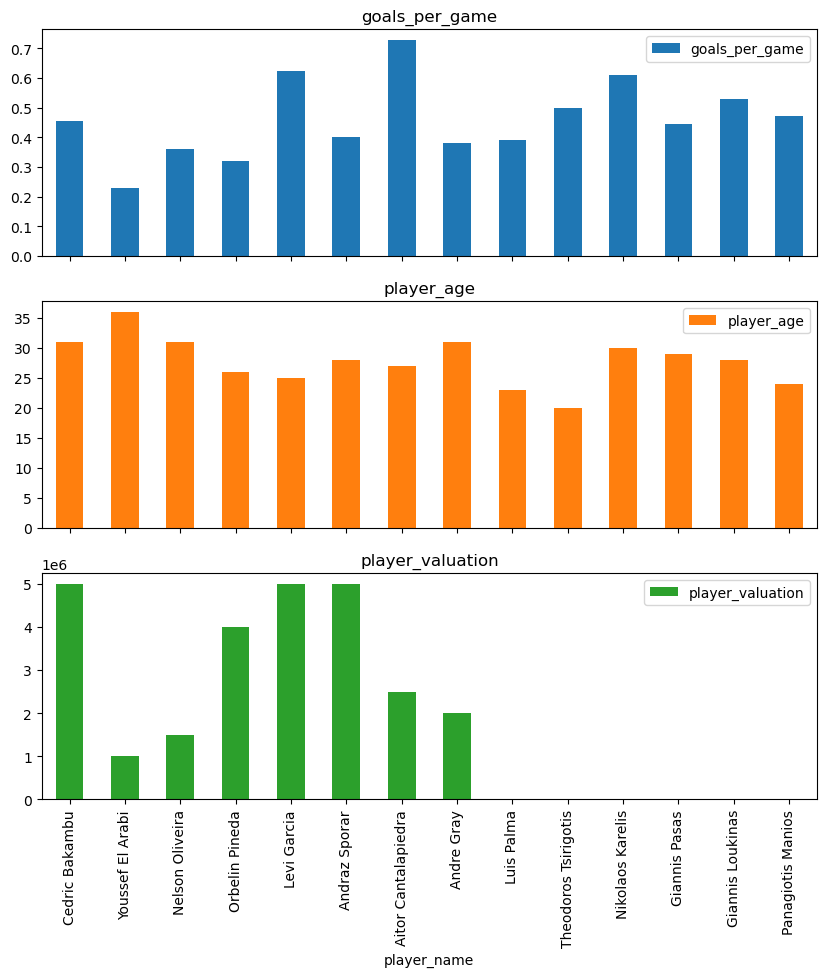

In [210]:
filtered_greece.plot(kind="bar", x="player_name", y=["goals_per_game", "player_age", "player_valuation"], subplots=True,
                     figsize=(10, 10))
plt.show()

In [211]:
df.query("player_age<25 and goals_per_game>0.5 and appearances>5")


,team_name,league,country,player_name,player_pos,player_age,nationality,in_squad,appearances,goals,...,date_of_last_contract_extension,outfitter,player_valuation,max_player_valuation,max_player_valuation_date,contract_option,on_loan_from,contract_there_expires,goals_per_game,player_population
825,AC Sparta Prague,Fortuna Liga,Czech Republic,Tomas Cvancara,CF,22.0,Czech Republic,19,19,10,...,2023-01-26,NaN,2000000.0,2000000.0,2022-12-14,NaN,NaN,NaN,0.526316,10724567
962,FC Banik Ostrava,Fortuna Liga,Czech Republic,Ladislav Almasi,CF,23.0,Slovakia,9,9,5,...,NaN,NaN,1700000.0,1700000.0,2022-06-22,NaN,NaN,NaN,0.555556,5457013
1473,DAC Dunajska Streda,Fortuna Liga,Slovakia,Nikola Krstovic,CF,22.0,Montenegro,26,26,19,...,NaN,Nike,1000000.0,1000000.0,2022-12-16,NaN,NaN,NaN,0.730769,628066
1526,Spartak Trnava,Fortuna Liga,Slovakia,Abdulrahman Taiwo,CF,24.0,Nigeria,12,12,7,...,NaN,NaN,NaN,NaN,2021-10-06,NaN,SönderjyskE,"Jun 30, 2025",0.583333,200963599
1629,AS Trencin,Fortuna Liga,Slovakia,Chinonso Emeka,CF,21.0,Nigeria,6,6,4,...,NaN,NaN,NaN,NaN,2021-06-07,NaN,NaN,NaN,0.666667,200963599
1674,FK Zeleziarne Podbrezova,Fortuna Liga,Slovakia,Moses David Cobnan,RW,20.0,Nigeria,21,21,14,...,NaN,NaN,NaN,NaN,2022-12-16,NaN,NaN,NaN,0.666667,200963599
2430,SK Sturm Graz,Bundesliga,Austria,Rasmus Hojlund,CF,20.0,Denmark,8,8,6,...,NaN,NaN,15000000.0,15000000.0,2022-09-27,NaN,NaN,NaN,0.750000,5822763
2470,LASK,Bundesliga,Austria,Keito Nakamura,LW,22.0,Japan,20,20,12,...,2022-08-16,NaN,4000000.0,4000000.0,2022-11-10,NaN,NaN,NaN,0.600000,126050000
2471,LASK,Bundesliga,Austria,Marin Ljubicic,CF,20.0,Croatia,19,19,13,...,2022-12-23,NaN,3500000.0,3500000.0,2022-11-10,NaN,NaN,NaN,0.684211,4087843
2856,NK Maribor,Prva Liga,Slovenia,Zan Vipotnik,CF,20.0,Slovenia,30,23,12,...,NaN,NaN,NaN,NaN,2022-12-15,NaN,NaN,NaN,0.521739,2079976


In [212]:
df = df_overall_data
df.query("player_name=='Rasmus Hojlund'")

,team_name,league,country,player_name,player_url,player_pos,player_age,nationality,in_squad,appearances,goals,minutes_played
2102,SK Sturm Graz,Bundesliga,Austria,Rasmus Hojlund,https://www.transfermarkt.com/rasmus-hojlund/p...,Centre-Forward,20.0,Denmark,8,8,6,654


<h3>Data from fbref

In [215]:
fbref_data = pd.DataFrame()
for url in pd.read_csv("./data/all_clubs_fbref.csv")["x"].tolist():
    fbref_data = pd.concat([fbref_data,pd.read_html(url)[0]])
    time.sleep(5)
fbref_data.columns = fbref_data.columns.droplevel()

HTTPError: HTTP Error 429: Too Many Requests

In [ ]:
fbref_data.head()